#  <font color='green'>Aluna: Ludmila Müller</font> - ludmilamuller7@gmail.com

# <font color='green'>INDICE</font>

* [1 Informações gerais](#1-Informações-gerais)
* [2 Rede Neural - rnn lstm](#2-Rede-neural---rnn-lstm)
* [3 Twitter - análise de sentimento](#3-Twitter---análise-de-sentimento)

# <font color='blue'>1 Informações gerais</font>

### 1.1 descrição do problema

Treinar uma rede neural sobre previsão de série temporal, pegando como exemplo uma série histórica da Apple na bolsa americana. Após isso, verificar se há relação entre o preço da ação e publicações no Twitter (#appl), por análise se sentimentos.

### 1.2 descrição da solução

A solução será por python, utilizando bibliotecas como numpy, pandas, matplotlib.pyplot, keras, tweepy,textblob.

### 1.3 descrição dos resultados

### 1.4 conclusões e trabalhos futuros

# <font color='blue'>2 Rede neural - rnn lstm</font>

#### 2.1 - Preprocessamento de Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-30,0.378214,0.383929,0.377679,0.380000,0.327807,204853600
1,2003-12-31,0.381250,0.384464,0.378214,0.381607,0.329194,174451200
2,2004-01-02,0.384821,0.388393,0.378214,0.380000,0.327807,144642400
3,2004-01-05,0.382500,0.399821,0.382500,0.395893,0.341517,395018400
4,2004-01-06,0.397321,0.400357,0.387679,0.394464,0.340285,509348000


In [3]:
# SEGREGAR BASE - TREINO E TESTE

df_treino = df[['Open']][:4239].copy()
df_teste = df[['Open']][4239:].copy()
print(len(df_treino) + len(df_teste) == len(df))

True


In [4]:
training_set = df_treino.values 

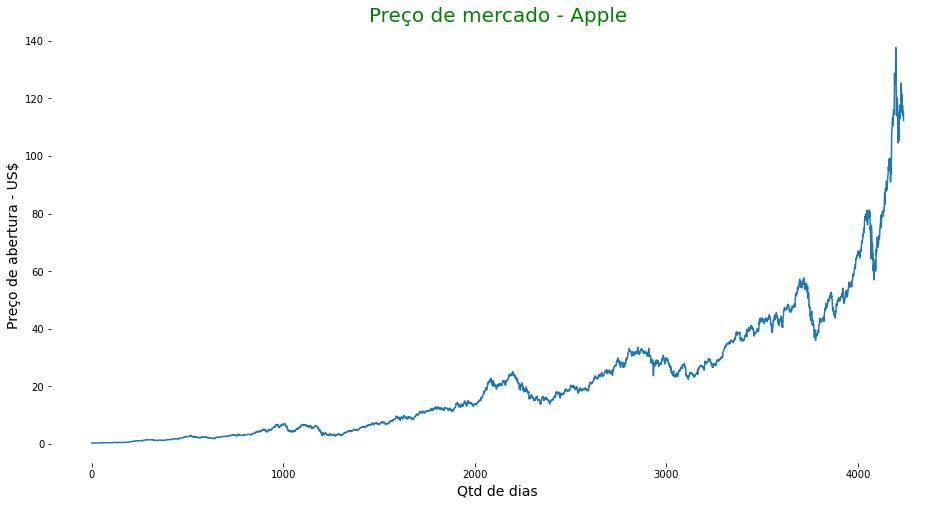

In [5]:
# GRÁFICO DA SÉRIE TEMPORAL

plt.rcParams["figure.figsize"] = [16, 8]
plt.plot(training_set)
plt.xlabel("Qtd de dias", fontsize = 14)
plt.ylabel("Preço de abertura - US$", fontsize = 14)
plt.title("Preço de mercado - Apple", fontsize = 20, color = 'g')
plt.box(False)

In [6]:
# NORMALIZAÇÃO 

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# ESTRUTURA DE DADOS - JANELA E SAÍDA/OUTPUT

window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []

for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train

array([[0.00000000e+00, 2.21263798e-05, 4.81518417e-05, ...,
        2.66791958e-04, 2.69401064e-04, 4.58102060e-04],
       [2.21263798e-05, 4.81518417e-05, 3.12363846e-05, ...,
        2.69401064e-04, 4.58102060e-04, 4.19060223e-04],
       [4.81518417e-05, 3.12363846e-05, 1.39251890e-04, ...,
        4.58102060e-04, 4.19060223e-04, 2.25148304e-04],
       ...,
       [9.10211799e-01, 8.79092045e-01, 8.62475403e-01, ...,
        8.53219609e-01, 8.45494340e-01, 8.28148912e-01],
       [8.79092045e-01, 8.62475403e-01, 8.81132679e-01, ...,
        8.45494340e-01, 8.28148912e-01, 8.38935129e-01],
       [8.62475403e-01, 8.81132679e-01, 8.71512513e-01, ...,
        8.28148912e-01, 8.38935129e-01, 8.35728443e-01]])

#### Reshaping

In [9]:
X_train.shape

(4229, 10)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape

(4229, 10, 1)

#### 2.2 - Construção da RNN

In [12]:
## IMPORTAR BIBLIOTECAS

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
## MONTAR REDE - CAMADAS, DROPOUT, COMPILAÇÃO E VISUALIZAÇÃO


regressor = Sequential() # Initicializar a RNN

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1))) # add a 1ª camada LSTM e Dropout 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, return_sequences = True)) # add a 2ª camada LSTM e Dropout
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) # add a 3ª camada LSTM e Dropout
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1)) # Camada de saída

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compilar a rede 

regressor.summary() # Visualizar a rede

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [14]:
## TREINAMENTO DA REDE

regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

Epoch 1/250
133/133 [==============================] - 7s 12ms/step - loss: 0.0082
Epoch 2/250
133/133 [==============================] - 2s 12ms/step - loss: 8.2747e-04
Epoch 3/250
133/133 [==============================] - 2s 11ms/step - loss: 5.9075e-04
Epoch 4/250
133/133 [==============================] - 1s 11ms/step - loss: 5.7416e-04
Epoch 5/250
133/133 [==============================] - 1s 11ms/step - loss: 7.5140e-04
Epoch 6/250
133/133 [==============================] - 1s 11ms/step - loss: 5.8544e-04
Epoch 7/250
133/133 [==============================] - 2s 12ms/step - loss: 4.4019e-04
Epoch 8/250
133/133 [==============================] - 2s 15ms/step - loss: 6.6499e-04
Epoch 9/250
133/133 [==============================] - 2s 13ms/step - loss: 4.9310e-04
Epoch 10/250
133/133 [==============================] - 1s 10ms/step - loss: 4.9146e-04
Epoch 11/250
133/133 [==============================] - 2s 11ms/step - loss: 5.2513e-04
Epoch 12/250
133/133 [=======================

133/133 [==============================] - 2s 14ms/step - loss: 2.7803e-04
Epoch 94/250
133/133 [==============================] - 2s 14ms/step - loss: 2.5829e-04
Epoch 95/250
133/133 [==============================] - 2s 14ms/step - loss: 2.7982e-04
Epoch 96/250
133/133 [==============================] - 2s 14ms/step - loss: 2.5290e-04
Epoch 97/250
133/133 [==============================] - 2s 14ms/step - loss: 2.8095e-04
Epoch 98/250
133/133 [==============================] - 2s 14ms/step - loss: 2.5991e-04
Epoch 99/250
133/133 [==============================] - 2s 15ms/step - loss: 3.5521e-04
Epoch 100/250
133/133 [==============================] - 2s 14ms/step - loss: 2.9921e-04: 
Epoch 101/250
133/133 [==============================] - 2s 14ms/step - loss: 2.7474e-04
Epoch 102/250
133/133 [==============================] - 2s 14ms/step - loss: 2.4345e-04
Epoch 103/250
133/133 [==============================] - 2s 14ms/step - loss: 2.7728e-04
Epoch 104/250
133/133 [================

133/133 [==============================] - 2s 14ms/step - loss: 2.5012e-04
Epoch 185/250
133/133 [==============================] - 2s 14ms/step - loss: 2.7670e-04
Epoch 186/250
133/133 [==============================] - 2s 14ms/step - loss: 2.4561e-04
Epoch 187/250
133/133 [==============================] - 2s 14ms/step - loss: 2.4526e-04: 0s - loss: 2.5 - ETA: 0s - loss: 2.4
Epoch 188/250
133/133 [==============================] - 2s 14ms/step - loss: 2.3866e-04
Epoch 189/250
133/133 [==============================] - 2s 14ms/step - loss: 2.5562e-04
Epoch 190/250
133/133 [==============================] - 2s 14ms/step - loss: 2.6684e-04
Epoch 191/250
133/133 [==============================] - 2s 14ms/step - loss: 2.5552e-04
Epoch 192/250
133/133 [==============================] - 2s 14ms/step - loss: 2.6647e-04
Epoch 193/250
133/133 [==============================] - 2s 14ms/step - loss: 2.4252e-04
Epoch 194/250
133/133 [==============================] - 2s 14ms/step - loss: 2.1276e-

#### 2.3 - Fazer as previsões e analisar os resultados

In [15]:
# BASE DE TESTE

real_stock_price = df_teste.values

In [16]:
# MONTAR ESTRUTURA PARA TESTE

dataset_total = pd.concat((df_treino.iloc[:,0], df_teste.iloc[:,0]), axis = 0)

testLength = len(df_teste)

inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(window, testLength + window): 
    X_test.append(inputs[i-window:i, 0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
# REALIZAR AS PREVISOES

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

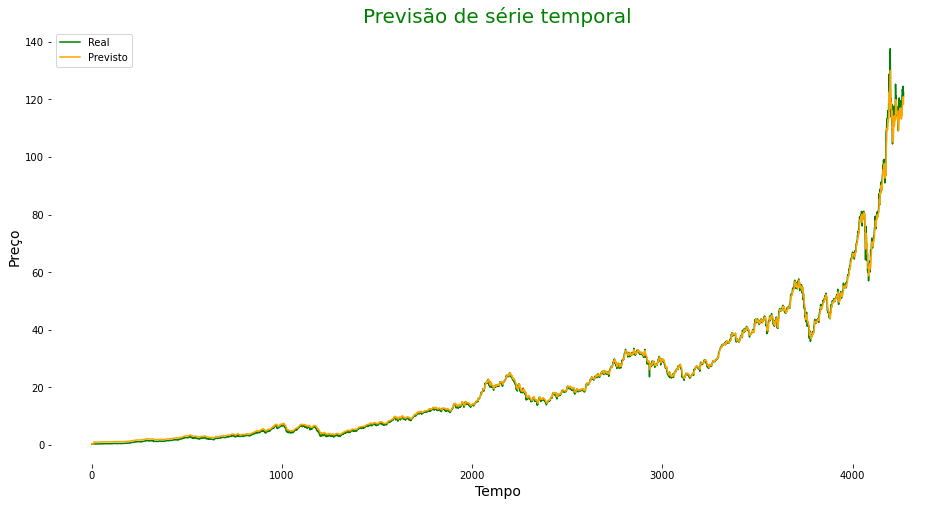

In [18]:
# RESULTADOS TREINO X TESTE - VISUALIZAR

allTargetData = np.vstack((training_set, real_stock_price))

training_predicted_stock_price = regressor.predict(X_train)
training_predicted_stock_price = sc.inverse_transform(training_predicted_stock_price)

allForecastedData = np.vstack((training_set[0:window], training_predicted_stock_price, predicted_stock_price))

plt.plot(allTargetData, color = 'green', label = 'Real')
plt.plot(allForecastedData, color = 'orange', label = 'Previsto')

plt.title('Previsão de série temporal', fontsize = 20, color = 'g')
plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Preço',fontsize = 14)
plt.legend()
#plt.savefig('predictions_training_test.svg')
plt.box(False)

In [19]:
# CHECK - P1

print(len(pd.DataFrame(data = allForecastedData)))
print(len(pd.DataFrame(data = allTargetData)))

# CHECK - P2

target = pd.DataFrame(data = allTargetData)
forecast = pd.DataFrame(data = allForecastedData)

target.rename({0:'target'}, axis = 1, inplace = True)
forecast.rename({0:'forecast'}, axis = 1, inplace = True)

df = target.copy()
df['forecast'] = forecast.copy()
df['dif'] = df.forecast - df.target
df.head()
#df.to_excel('verificar_forecast_target_diff.xlsx')

4269
4269


,target,forecast,dif
0,0.378214,0.378214,0.0
1,0.381250,0.381250,0.0
2,0.384821,0.384821,0.0
3,0.382500,0.382500,0.0
4,0.397321,0.397321,0.0


#### 2.4 - Métricas de avaliação

In [20]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

mse = mean_squared_error(real_stock_price, predicted_stock_price)

mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100

print('RMSE: ', rmse)
print('MSE: ',mse)
print('MAPE: ',mape)

RMSE:  3.6362571458888375
MSE:  13.222366031027635
MAPE:  2.617586393674408


# <font color='blue'>3 Twitter - análise de sentimento</font>

In [22]:
# importar bibliotecas
import tweepy # Tweepy - Python library for accessing the Twitter API.
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud
import re

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [23]:
# twitter api

twitterApiKey = 'McZQC8ZsMuQDoTcjbuc2CZE5y'
twitterApiSecret = 'JbQtNHzu46OSIVUXZMNoshsRVCMkStmixCyi4lhFSmCLjvZTYG'
twitterApiAccessToken = '1185564033614790657-u7UbsVJuUMdgUSRy5BgGnaKZTcBEHZ'
twitterApiAccessTokenSecret = 'DYipens9cbOiyyf6ob5MHuXPHfGb04pVTdpocTyJmbxPp'

In [24]:
# autenticar
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [25]:
# coletar tweets

# procura - termos e datas
search_words = "#AAPL"
date_since = "2020-10-30"
#date_until = '2020-12-11'


# coleta de tweets
tweets = tweepy.Cursor(twetterApi.search,
                    q=search_words,
                    lang="en",
                    since=date_since).items(1000) #until=date_until

# consolidar tweets na lista
lista=[]
for tweet in tweets:
    lista.append(tweet.text)
    
# criar dataframe com tweets    
df = pd.DataFrame(data=lista, columns=['Tweet'])
df.head()

,Tweet
0,"RT @AAPL_moves: Apple Inc price at close, 2021..."
1,"Apple Inc price at close, 2021-01-04, is 129.4..."
2,RT @tq_equities: $AAPL finds support at 20-day...
3,$AAPL finds support at 20-day moving average: ...
4,Apple Inc is doomed. $AAPL dropped by 2.4719%!...


In [26]:
# limpar tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [27]:
# polaridade e subjetividade

def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)
df.head()

,Tweet,Subjectivity,Polarity
0,"Apple Inc price at close, 2021-01-04, is 129.4...",0.0,0.00
1,"Apple Inc price at close, 2021-01-04, is 129.4...",0.0,0.00
2,$AAPL finds support at 20-day moving average: ...,0.4,-0.15
3,$AAPL finds support at 20-day moving average: ...,0.4,-0.15
4,Apple Inc is doomed. $AAPL dropped by 2.4719%!...,0.4,0.00


In [28]:
df = df.drop(df[df['Tweet'] == ''].index)
df.head()

,Tweet,Subjectivity,Polarity
0,"Apple Inc price at close, 2021-01-04, is 129.4...",0.0,0.00
1,"Apple Inc price at close, 2021-01-04, is 129.4...",0.0,0.00
2,$AAPL finds support at 20-day moving average: ...,0.4,-0.15
3,$AAPL finds support at 20-day moving average: ...,0.4,-0.15
4,Apple Inc is doomed. $AAPL dropped by 2.4719%!...,0.4,0.00


In [29]:
# classificar tweets - neutros, positivos e negativos
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"
    
df['Score'] = df['Polarity'].apply(getTextAnalysis)
df.head()

,Tweet,Subjectivity,Polarity,Score
0,"Apple Inc price at close, 2021-01-04, is 129.4...",0.0,0.00,Neutral
1,"Apple Inc price at close, 2021-01-04, is 129.4...",0.0,0.00,Neutral
2,$AAPL finds support at 20-day moving average: ...,0.4,-0.15,Negative
3,$AAPL finds support at 20-day moving average: ...,0.4,-0.15,Negative
4,Apple Inc is doomed. $AAPL dropped by 2.4719%!...,0.4,0.00,Neutral


In [37]:
# percentuais - neutros, positivos e negativos - dos tweets

positive = df[df['Score'] == 'Positive']
neutral = df[df['Score'] == 'Neutral']
neg = df[df['Score'] == 'Negative']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")
print(str(neutral.shape[0]/(df.shape[0])*100) + " % of neutral tweets")
print(str(neg.shape[0]/(df.shape[0])*100) + " % of negative tweets")

41.08352144469526 % of positive tweets
45.372460496613996 % of neutral tweets
13.544018058690746 % of negative tweets


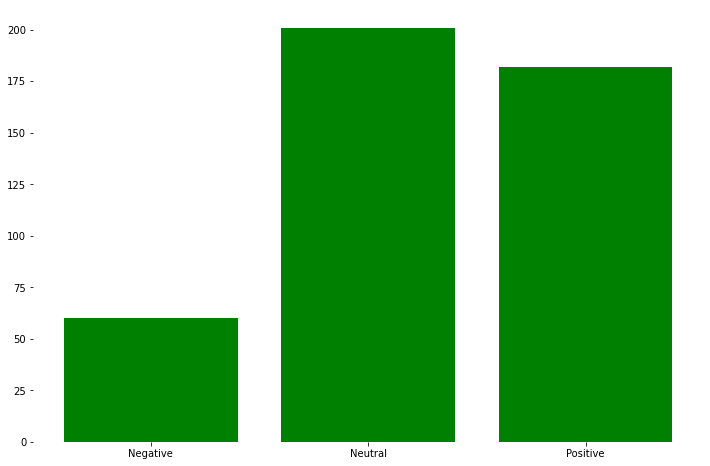

In [39]:
# percentuais - neutros, positivos e negativos - dos tweets GRAFICO BARRAS 
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values

plt.bar(labels, values, color = 'green')
plt.box(False)

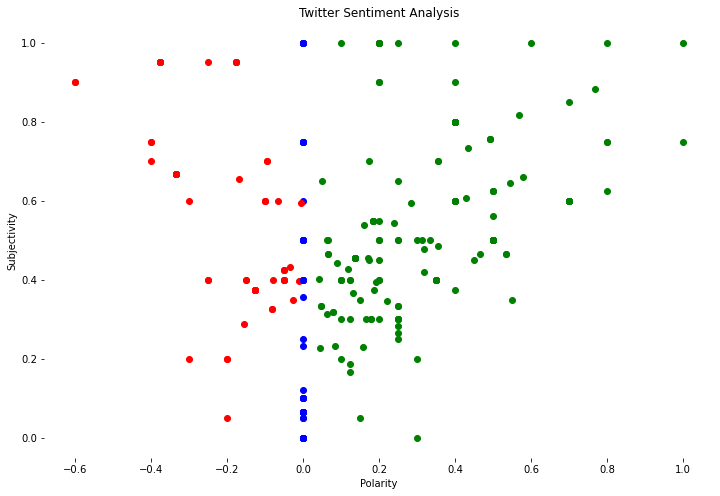

In [41]:
# percentuais - neutros, positivos e negativos - dos tweets GRAFICO DISPERSÃO 

for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.box(False)

In [43]:
objective = df[df['Subjectivity'] == 0]
print(str(objective.shape[0]/(df.shape[0])*100) + " % de tweets com finalidade")

36.3431151241535 % de tweets com finalidade


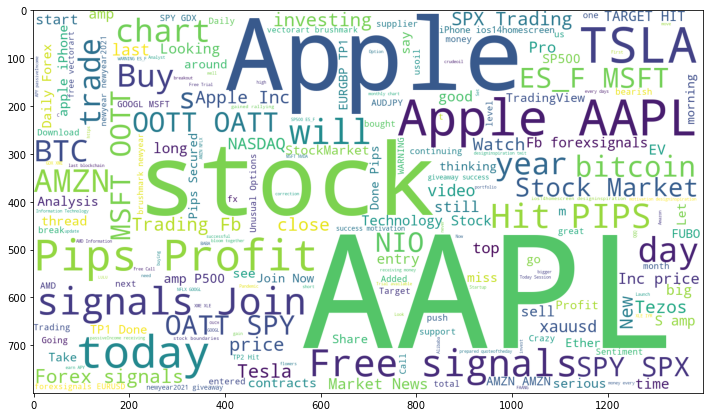

In [49]:
# word cloud

words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=1400, height=800, background_color = 'white').generate(words)

plt.imshow(wordCloud)
plt.show()